<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica21_263150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Práctica 21: Ejercicios con EDA 2**
---

Alumno: Álvaro Hernandez Jarquín<br>
Seminario: Programación para analítica descriptiva y predictiva
---

**Descripción del conjunto de datos:**


* Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.

* Puedes emplear este código para cargar tu conjunto de datos
```
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names
```
**Instrucciones para los estudiantes:**

1. Descargar el archivo haberman.data desde el enlace proporcionado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos la base de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

# Empezamos descripción
print("Encabezado:\n")
print(data.head())
print("="*100)

print("Información general:\n")
print(data.info())
print("="*100)

print("Descripción estadística:\n")
print(data.describe())
print("="*100)



Encabezado:

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None
Descripción estadística:

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.0

2. Realizar un EDA completo, incluyendo:
* Descripción de los datos.




In [ ]:
# Contamos los valores NaN
print("\nNaNs por columna:")
print(data.isna().sum())

# Contamos ceros
print("\nCeros por columna:")
print((data == 0).sum())


NaNs por columna:
age       0
year      0
nodes     0
status    0
dtype: int64

Ceros por columna:
age         0
year        0
nodes     136
status      0
dtype: int64


* Histogramas para las columnas numéricas.


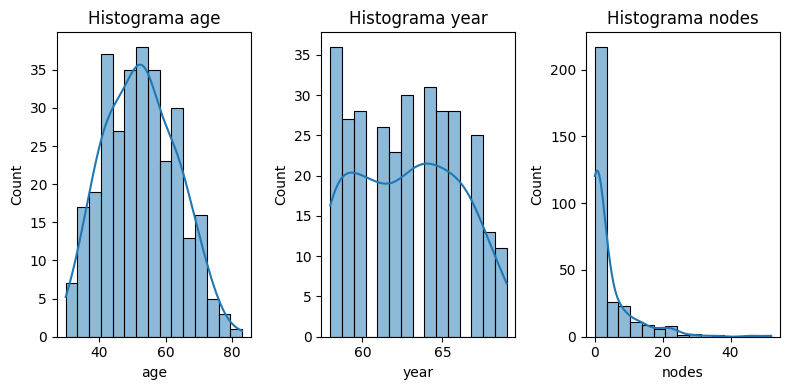

In [ ]:
# Seleccionamos las columnas numéricas
columnas_numericas = ['age', 'year', 'nodes']

# Creamos un histograma para cada columna numérica
plt.figure(figsize=(8,4))
for i, col in enumerate(columnas_numericas,1):
    plt.subplot(1,3,i)
    sns.histplot(data[col], bins=15, kde=True)
    plt.title(f'Histograma {col}')
plt.tight_layout()
plt.show()

* Gráficas de densidad

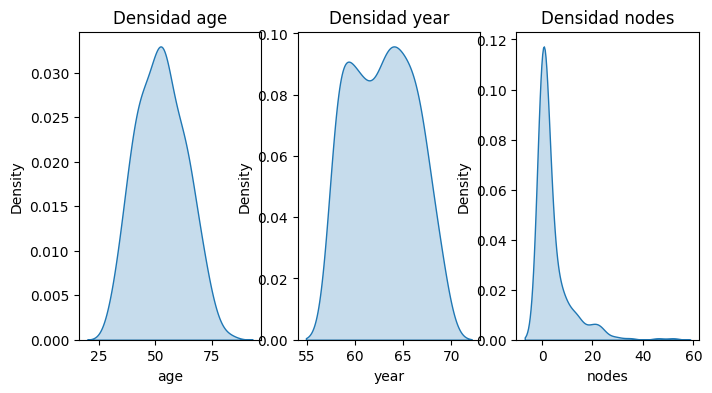

In [ ]:
# Gráficas de densidad de las columnas numéricas
plt.figure(figsize=(8,4))
for i, col in enumerate(columnas_numericas,1):
    plt.subplot(1,3,i)
    sns.kdeplot(data[col], fill=True)
    plt.title(f'Densidad {col}')

* Gráficas de barras para la columna categórica status (supervivencia).


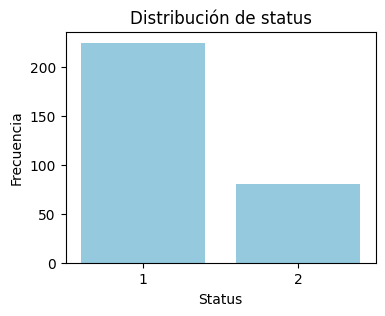

In [ ]:
# Gráfica de barras para la columna categórica status(supervivencia)
plt.figure(figsize=(4,3))
sns.countplot(x='status', data=data, color="skyblue")
plt.title('Distribución de status')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

* Boxplots para identificar outliers en las columnas numéricas.


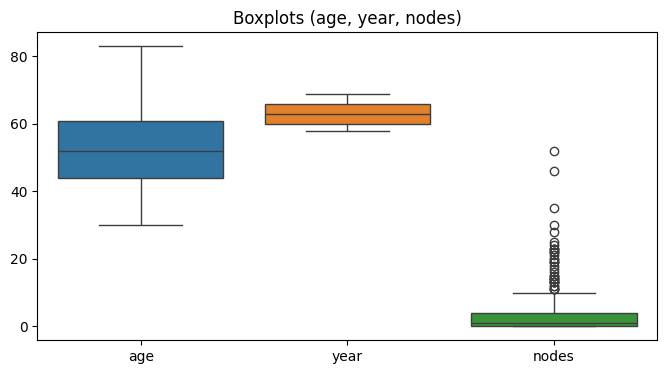

In [ ]:
# Boxplots para identificar outliers en las columnas numéricas.
plt.figure(figsize=(8,4))
sns.boxplot(data=data[columnas_numericas])
plt.title('Boxplots (age, year, nodes)')
plt.show()

* Matriz de correlación y mapa de calor.



Matriz de correlación:
             age      year     nodes
age    1.000000  0.089529 -0.063176
year   0.089529  1.000000 -0.003764
nodes -0.063176 -0.003764  1.000000


Text(0.5, 1.0, 'Matriz de Correlación')

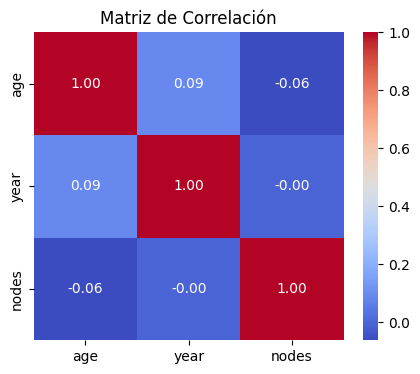

In [ ]:
# Matriz de correlación y mapa de calor.
correlation_matrix = data[columnas_numericas].corr()
print("\nMatriz de correlación:\n", correlation_matrix)
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')

* Pairplot para visualizar relaciones entre variables numéricas.



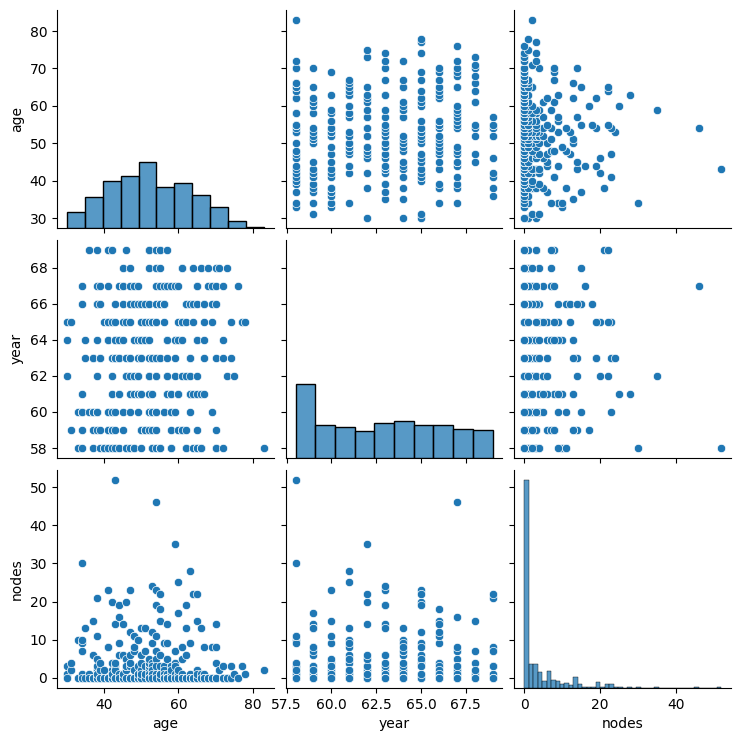

In [ ]:
# Pairplot para visualizar relaciones entre variables numéricas.
sns.pairplot(data[columnas_numericas])
plt.show()

* Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) QQplot para las columnas numéricas.


Prueba de normalidad para age:
Shapiro-Wilk: stat=0.989, p=0.026
Anderson-Darling: stat=0.732
Kolmogorov-Smirnov: stat=0.048, p=0.470


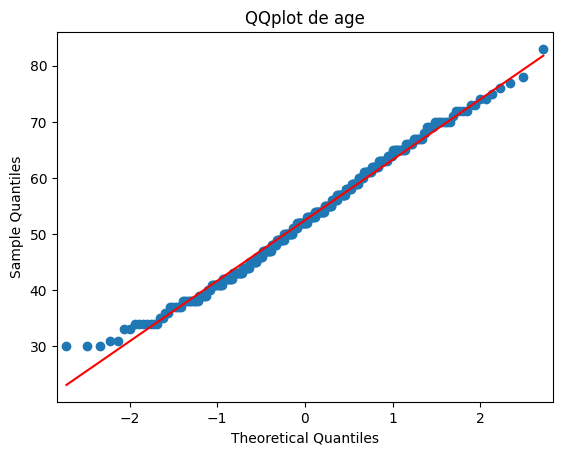


Prueba de normalidad para year:
Shapiro-Wilk: stat=0.947, p=0.000
Anderson-Darling: stat=4.314
Kolmogorov-Smirnov: stat=0.107, p=0.002


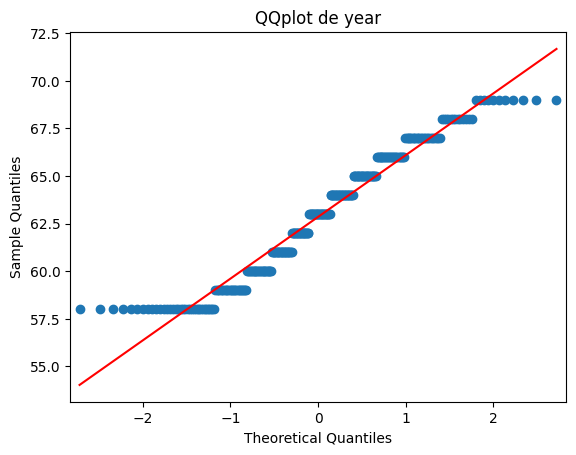


Prueba de normalidad para nodes:
Shapiro-Wilk: stat=0.615, p=0.000
Anderson-Darling: stat=39.687
Kolmogorov-Smirnov: stat=0.288, p=0.000


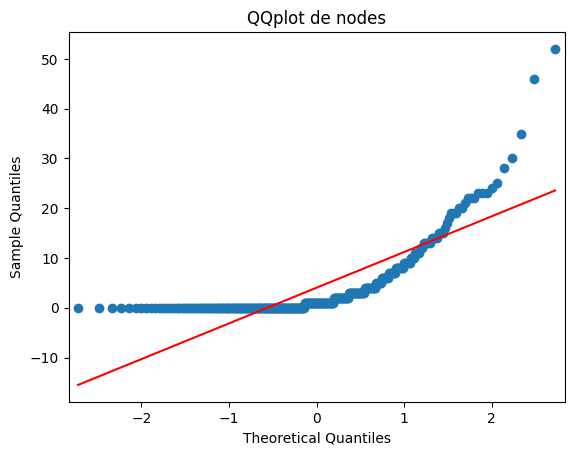

In [ ]:
# Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) QQplot para las columnas numéricas.
from scipy.stats import shapiro, anderson, kstest, norm
import statsmodels.api as sm

for col in ['age','year','nodes']:
    print(f"\nPrueba de normalidad para {col}:")
    # Shapiro-Wilk
    stat, p = shapiro(data[col])
    print(f"Shapiro-Wilk: stat={stat:.3f}, p={p:.3f}")

    # Anderson-Darling
    result = anderson(data[col])
    print('Anderson-Darling: stat=%.3f' % result.statistic)

    # Kolmogorov-Smirnov (comparando con normal)
    standardized_data = (data[col] - data[col].mean())/data[col].std()
    stat, p = kstest(standardized_data, 'norm')
    print(f"Kolmogorov-Smirnov: stat={stat:.3f}, p={p:.3f}")

    # QQplot
    sm.qqplot(data[col], line='s')
    plt.title(f"QQplot de {col}")
    plt.show()




3. Identificar y tratar los datos faltantes utilizando técnicas como imputación por media, mediana o moda.

En este ejemplo no se realizo un tratamiento para datos faltantes, ya que los ceros que existían en nodos, correspondían de forma veraz al hecho de que no se presentaban nodos en el paciente.

4. Repetir el EDA después del tratamiento de datos faltantes y comparar los resultados
No se realizó imputación de datos, por lo que no hay una versión a la que se realizó el tratamiento de datos faltantes